In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt

### 1a)

#### Delta

In [2]:
def bsmCallDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(d1)
    
    return delta

In [3]:
def bsmPutDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(-d1)

    return delta

#### Gamma

In [4]:
def bsmCallGamma(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    gamma = (np.exp(-div * tau) * norm.pdf(d1))/(spot * vol * np.sqrt(tau))
    
    return gamma

In [5]:
def bsmPutGamma(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    gamma = (np.exp(-div * tau) * norm.pdf(d1))/(spot * vol * np.sqrt(tau))
    
    return gamma

#### Rho

In [6]:
def bsmCallRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Rho =  tau * strike * (np.exp(-rate * tau)) * norm.cdf(d2)
    
    return Rho

In [7]:
def bsmPutRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Rho =  -tau * strike * (np.exp(-rate * tau)) * norm.cdf(-d2)
    
    return Rho

#### Theta

In [8]:
def bsmCallTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    theta = (div * strike ** (-div * tau) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2))
    - ((strike * np.exp(-rate * tau * norm.pdf(d2) * vol))/2 * np.sqrt(tau))
    
    return theta

In [9]:
def bsmPutTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    theta = ((div * strike ** (-div * tau) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2))
    - ((strike * np.exp(-rate * tau * norm.pdf(d2) * vol))/2 * np.sqrt(tau)))
    + ((rate * strike * np.exp(-rate * tau)) - (div * spot * np.exp(-div * tau)))
    
    return theta

#### Vega

In [10]:
def bsmCallVega(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    vega = (spot * np.exp(-div * tau)) * norm.pdf(d1) * np.sqrt(tau)
    
    return vega

In [11]:
def bsmPutVega(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    vega = (spot * np.exp(-div * tau)) * norm.pdf(d1) * np.sqrt(tau)
    
    return vega

### 1b)

C:\Users\neske\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\neske\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


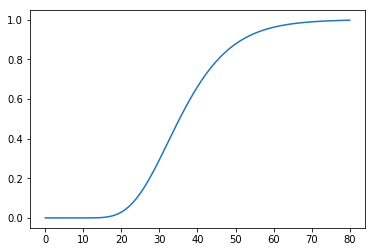

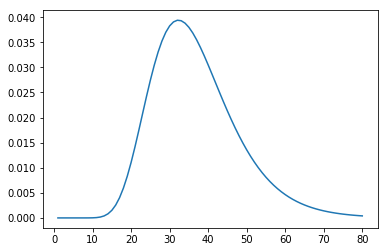

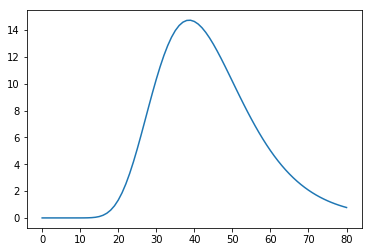

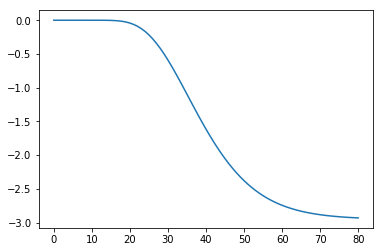

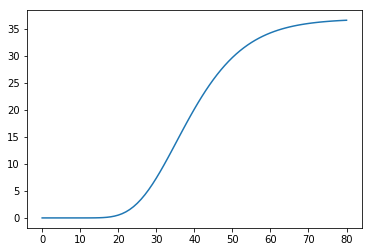

In [12]:
strike = 40
vol = .30
rate = .08
tau = 1.0
div = 0.0
call_deltas = np.empty(81)
call_gammas = np.empty(81)
call_vegas = np.empty(81)
call_thetas = np.empty(81)
call_rhos = np.empty(81)

for i in range(81):
    call_deltas[i] = bsmCallDelta(i, strike, vol, rate, tau, div)
    call_gammas[i] = bsmCallGamma(i, strike, vol, rate, tau, div)
    call_vegas[i] = bsmCallVega(i, strike, vol, rate, tau, div)
    call_thetas[i] = bsmCallTheta(i, strike, vol, rate, tau, div)
    call_rhos[i] = bsmCallRho(i, strike, vol, rate, tau, div)

plt.plot(call_deltas)
plt.show()

plt.plot(call_gammas)
plt.show()

plt.plot(call_vegas)
plt.show()

plt.plot(call_thetas)
plt.show()

plt.plot(call_rhos)
plt.show()

### 1c)

C:\Users\neske\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\neske\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


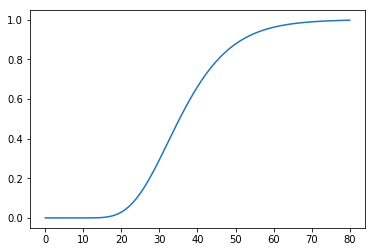

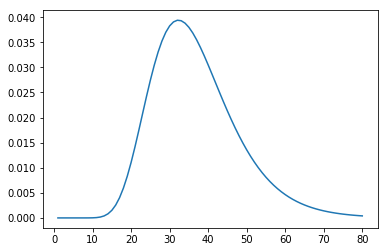

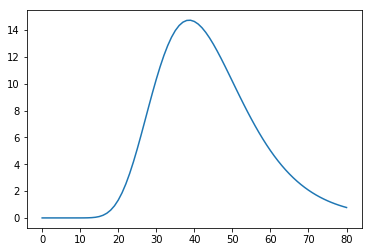

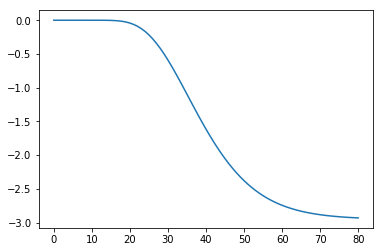

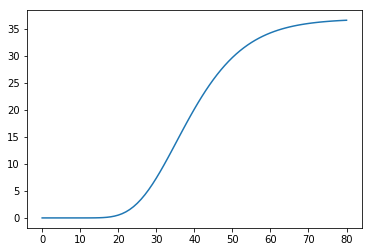

In [13]:
put_deltas = np.empty(81)
put_gammas = np.empty(81)
put_vegas = np.empty(81)
put_thetas = np.empty(81)
put_rhos = np.empty(81)

for i in range(81):
    put_deltas[i] = bsmPutDelta(i, strike, vol, rate, tau, div)
    put_gammas[i] = bsmPutGamma(i, strike, vol, rate, tau, div)
    put_vegas[i] = bsmPutVega(i, strike, vol, rate, tau, div)
    put_thetas[i] = bsmPutTheta(i, strike, vol, rate, tau, div)
    put_rhos[i] = bsmPutRho(i, strike, vol, rate, tau, div)

plt.plot(call_deltas)
plt.show()	

plt.plot(call_gammas)
plt.show()

plt.plot(call_vegas)
plt.show()

plt.plot(call_thetas)
plt.show()

plt.plot(call_rhos)
plt.show()

### 2)

In [14]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Daily Prices")
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price ($)")
    plt.xlim((0, nsteps - 1))
    plt.grid(True)
    plt.show()

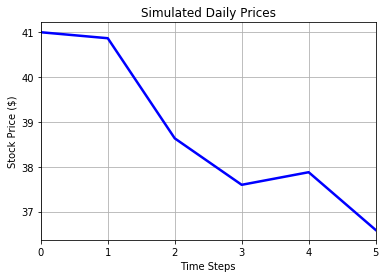

In [15]:
S = 41.0
K = 40.0
v = 0.30
r = 0.08
q = 0.0
T = 1.0
n = 6
h = T / 252

path = np.zeros(n)
z = np.random.normal(size=n)
path[0] = S

for t in range(1, n):
    path[t] = path[t-1] * np.exp((r - q - 0.5 * v * v) * h + v * np.sqrt(h) * z[t])
    
plotPricePath(path)